In [1]:
# import modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import dill
from scipy.stats import pearsonr
import math
from scipy.stats import chi2_contingency

%matplotlib inline

In [2]:
# functions
def V_cramer(tab, n):
    # Initiating objects
    nrow, ncol = tab.shape
    resultats_test = chi2_contingency(tab)
    statistique = resultats_test[0]
    # Computing objects
    r = ncol - (((ncol - 1) **  2) / (n - 1))
    k = nrow - (((nrow - 1) **  2) / (n - 1))
    phi_squared = max(0, ((statistique / n) - (((ncol - 1) * (nrow - 1)) / (n - 1))))
    V = math.sqrt((phi_squared / (min(k - 1, r - 1))))
    return V

In [3]:
##### Import of tables into dataframes
dfLieux = pd.read_csv('./import/20220906_table_lieux.csv', sep=',')
dfUsagers = pd.read_csv('./import/20220906_table_usagers.csv', sep=',')
dfUsagers = dfUsagers.drop(["Unnamed: 0.1","Unnamed: 0"], axis = 1)
dfVehicules = pd.read_csv('./import/20220906_table_vehicules.csv', sep=',')
dfVehicules = dfVehicules.drop(["Unnamed: 0.1","Unnamed: 0"], axis = 1)
dfCarac = pd.read_csv('./import/20220906_table_caracteristiques.csv', sep=',')
dfPool = pd.read_csv('./import/20221023_table_pool.csv', sep=',')


C:\Users\possa\AppData\Local\Temp\ipykernel_20464\2312992414.py:2: DtypeWarning: Columns (4,9,10,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dfLieux = pd.read_csv('./import/20220906_table_lieux.csv', sep=',')
C:\Users\possa\AppData\Local\Temp\ipykernel_20464\2312992414.py:3: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  dfUsagers = pd.read_csv('./import/20220906_table_usagers.csv', sep=',')
C:\Users\possa\AppData\Local\Temp\ipykernel_20464\2312992414.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dfVehicules = pd.read_csv('./import/20220906_table_vehicules.csv', sep=',')
C:\Users\possa\AppData\Local\Temp\ipykernel_20464\2312992414.py:7: DtypeWarning: Columns (6,12,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  dfCarac = pd.read_csv('./import/20220906_table_caracteristiques.csv', sep=','

In [4]:
print('dfLieux dimensions:', dfLieux.shape)
print('dfUsagers dimensions:', dfUsagers.shape)
print('dfVehicules dimensions:', dfVehicules.shape)
print('dfCarac dimensions:', dfCarac.shape)
print('dfPool dimensions:', dfPool.shape)

dfLieux dimensions: (1065053, 22)
dfUsagers dimensions: (2380467, 17)
dfVehicules dimensions: (1817587, 12)
dfCarac dimensions: (1065053, 19)
dfPool dimensions: (1065053, 69)


# Descriptive Statistics

## Tables des usagers

In [5]:
# Computing date variable
dfCarac['date'] = dfCarac['jour'].astype(str) + '-' + dfCarac['mois'].astype(str) + '-' + dfCarac['an'].astype(str)
dfCarac['date'] = pd.to_datetime(dfCarac['date']);

# Computing months with categorical labels
dfCarac['mois_label'] = dfCarac['mois']
dfCarac['mois_label'] = dfCarac['mois_label'].replace(to_replace=np.arange(1, 13, 1), 
                                                      value=['jan', 'fev', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
# Days of the week
dfCarac['weekday'] = dfCarac['date'].dt.weekday

# Hour of the day
dfCarac['hrmn'] = dfCarac['hrmn'].replace('\:', '', regex=True).astype(int)
dfCarac['hour'] = dfCarac['hrmn']//100

# Year of accident
dfCarac['year'] = dfCarac['date'].dt.year

# Adding the year variable to dfUsagers dataframe
dfUsagers = dfUsagers.merge(right=dfCarac[['Num_Acc', 'year']], on='Num_Acc')

# Age of people during the accident (removing ages above 99, could be completion issues and there are very few values)
dfUsagers['age'] = dfUsagers.year - dfUsagers.an_nais
dfUsagers.loc[dfUsagers['age'] > 99, 'age'] = np.NAN

C:\Users\possa\AppData\Local\Temp\ipykernel_20464\1196794612.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dfCarac['date'] = pd.to_datetime(dfCarac['date']);


In [6]:
## actp: harmonization des valeurs et transformation des -1 en NA
dfUsagers['actp'] = dfUsagers['actp'].replace({'0.0':0, '0':0, 0:0, 'O':0,
                                            #   '-1.0':np.NAN, '-1':np.NAN, ' -1':np.NAN, -1:np.NAN,
                                              '-1.0':0, '-1':0, ' -1':0, -1:0,
                                              '1.0':1, '1':1, 1:1,
                                              '2.0':2, '2':2, 2:2,
                                              '3.0':3, '3':3, 3:3,
                                              '4.0':4, '4':4, 4:4,
                                              '5.0':5, '5':5, 5:5,
                                              '6.0':6, '6':6, 6:6,
                                              '7.0':7, '7':7, 7:7,
                                              '8.0':8, '8':8, 8:8,
                                              '9.0':9, '9':9, 9:9,
                                              'A'  :10,'B':11
                                              })

In [7]:
dfUsagers['place']=dfUsagers['place'].astype('Int32')
dfUsagers['secu'] =dfUsagers['secu'].astype('Int32')

dfUsagers['an_nais']=dfUsagers['an_nais'].astype('Int32')

# Age of people during the accident (removing ages above 99, could be completion issues and there are very few values)
dfUsagers['age'] = dfUsagers.year - dfUsagers.an_nais
dfUsagers.loc[dfUsagers['age'] > 99, 'age'] = np.nan

dfUsagers['actp'] =dfUsagers['actp'].astype('Int32')
dfUsagers['locp'] =dfUsagers['locp'].astype('Int32')
dfUsagers['etatp']=dfUsagers['etatp'].astype('Int32')
dfUsagers['secu1']=dfUsagers['secu1'].astype('Int32')
dfUsagers['secu2']=dfUsagers['secu2'].astype('Int32')
dfUsagers['secu3']=dfUsagers['secu3'].astype('Int32')


dfUsagers.info()
dfUsagers.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380467 entries, 0 to 2380466
Data columns (total 19 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Num_Acc      int64  
 1   place        Int32  
 2   catu         int64  
 3   grav         int64  
 4   sexe         int64  
 5   trajet       float64
 6   secu         Int32  
 7   locp         Int32  
 8   actp         Int32  
 9   etatp        Int32  
 10  an_nais      Int32  
 11  num_veh      object 
 12  id_vehicule  object 
 13  secu1        Int32  
 14  secu2        Int32  
 15  secu3        Int32  
 16  grav2        int64  
 17  year         int64  
 18  age          Int64  
dtypes: Int32(9), Int64(1), float64(1), int64(6), object(2)
memory usage: 304.2+ MB


,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,id_vehicule,secu1,secu2,secu3,grav2,year,age
0,201600000001,1,1,1,2,0.0,11,0,0,0,1983,B02,NaN,<NA>,<NA>,<NA>,1,2016,33
1,201600000001,1,1,3,1,9.0,21,0,0,0,2001,A01,NaN,<NA>,<NA>,<NA>,3,2016,15
2,201600000002,1,1,3,1,5.0,11,0,0,0,1960,A01,NaN,<NA>,<NA>,<NA>,3,2016,56
3,201600000002,2,2,3,1,0.0,11,0,0,0,2000,A01,NaN,<NA>,<NA>,<NA>,3,2016,16
4,201600000002,3,2,3,2,0.0,11,0,0,0,1962,A01,NaN,<NA>,<NA>,<NA>,3,2016,54


In [8]:
100 *dfUsagers['age'].isna().sum() / (dfUsagers['age'].isna().count())
#Il y a 0.1% de Nan  -->supprime les usagers sans age
dfUsagers.dropna(subset=['age'], inplace=True)

In [9]:
dfUsagers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2377551 entries, 0 to 2380466
Data columns (total 19 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Num_Acc      int64  
 1   place        Int32  
 2   catu         int64  
 3   grav         int64  
 4   sexe         int64  
 5   trajet       float64
 6   secu         Int32  
 7   locp         Int32  
 8   actp         Int32  
 9   etatp        Int32  
 10  an_nais      Int32  
 11  num_veh      object 
 12  id_vehicule  object 
 13  secu1        Int32  
 14  secu2        Int32  
 15  secu3        Int32  
 16  grav2        int64  
 17  year         int64  
 18  age          Int64  
dtypes: Int32(9), Int64(1), float64(1), int64(6), object(2)
memory usage: 303.8+ MB


In [10]:
### Proportion of NA by variable
dfUsagers.isnull().sum() * 100 / len(dfUsagers)

Num_Acc         0.000000
place           5.177218
catu            0.000000
grav            0.000000
sexe            0.000000
trajet          0.020694
secu           12.390733
locp            2.369497
actp            2.373745
etatp           2.371894
an_nais         0.000000
num_veh         0.000000
id_vehicule    89.986629
secu1          89.986629
secu2          89.986629
secu3          89.986629
grav2           0.000000
year            0.000000
age             0.000000
dtype: float64

In [11]:
# Number of modalities by variable
print('Num_Acc', len(dfUsagers.Num_Acc.value_counts()))
print('place', len(dfUsagers.place.value_counts()))
print('catu', len(dfUsagers.catu.value_counts()))
print('grav', len(dfUsagers.grav.value_counts()))
print('sexe', len(dfUsagers.sexe.value_counts()))
print('trajet', len(dfUsagers.trajet.value_counts()))
print('secu', len(dfUsagers.secu.value_counts()))
print('locp', len(dfUsagers.locp.value_counts()))
print('actp', len(dfUsagers.actp.value_counts()))
print('etatp', len(dfUsagers.etatp.value_counts()))
print('age', len(dfUsagers.age.value_counts()))
print('num_veh', len(dfUsagers.num_veh.value_counts()))
print('id_vehicule', len(dfUsagers.id_vehicule.value_counts()))
print('secu1', len(dfUsagers.secu1.value_counts()))
print('secu2', len(dfUsagers.secu2.value_counts()))
print('secu3', len(dfUsagers.secu3.value_counts()))
print('grav2', len(dfUsagers.grav2.value_counts()))



Num_Acc 1064541
place 11
catu 4
grav 4
sexe 2
trajet 8
secu 24
locp 11
actp 12
etatp 5
age 100
num_veh 163
id_vehicule 177720
secu1 11
secu2 11
secu3 11
grav2 4


###  GRAPHS

#### Distribution des variables

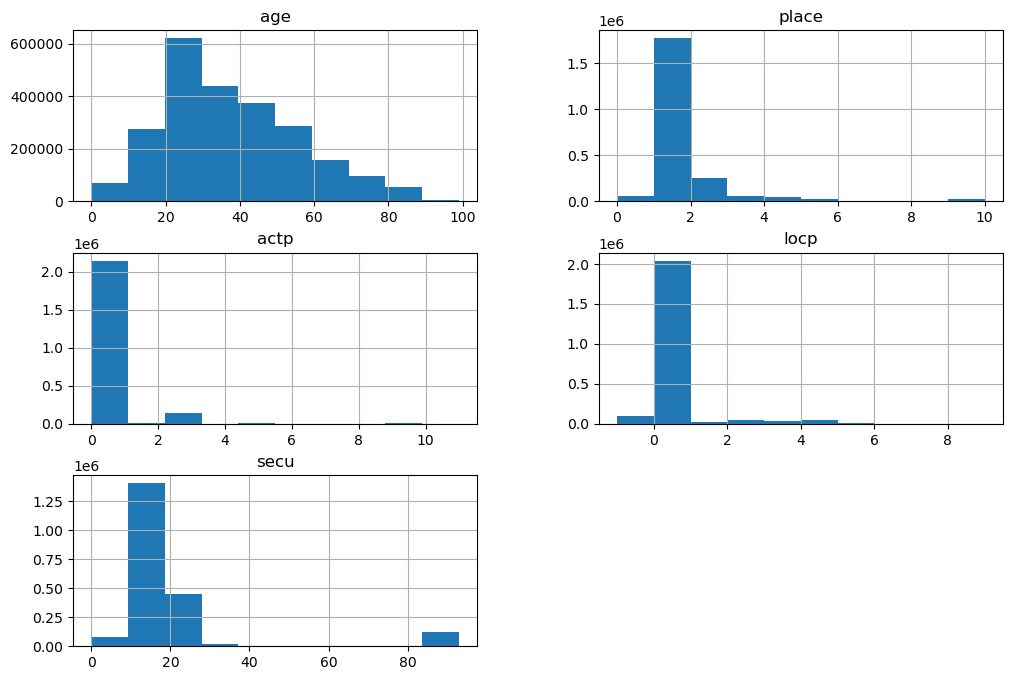

In [12]:
dfUsagers[['age','place','actp','locp','secu']].hist(figsize=(12, 8));


C:\Users\possa\AppData\Local\Temp\ipykernel_20464\3061787389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade']=10*dfUsagers['age'].floordiv(10)


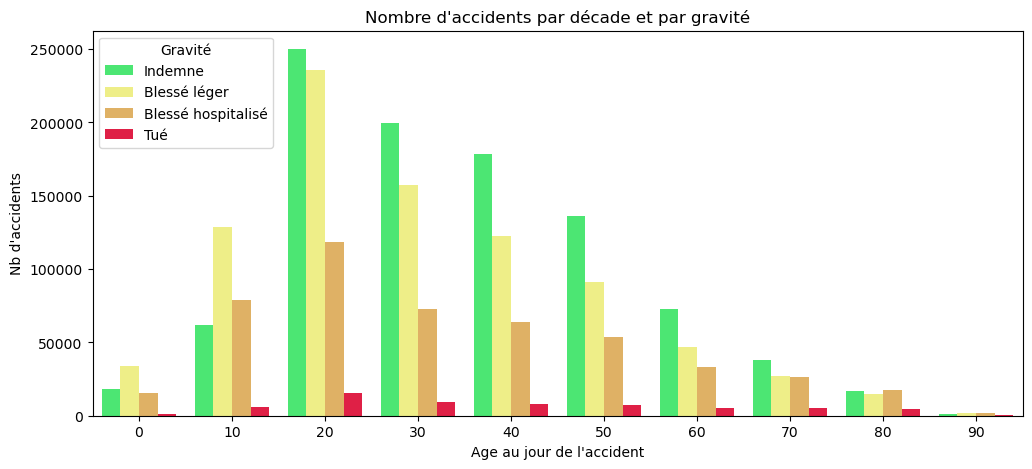

In [13]:
#nbre d'accidents par année de nais. et par gravité
df=dfUsagers[['Num_Acc','age','grav2']]
df['decade']=10*dfUsagers['age'].floordiv(10)

plt.figure(figsize=(12,5))
ax=sns.countplot(x='decade',data=df,palette=['#33FF66','#FFFF77','#F4B650','#FF0033'],hue='grav2')
ax.set_xlabel("Age au jour de l'accident", fontsize = 10)
ax.set_ylabel("Nb d'accidents", fontsize = 10)
ax.set_title("Nombre d'accidents par décade et par gravité");

ax.legend(title='Gravité', loc='upper left', labels=['Indemne', 'Blessé léger', 'Blessé hospitalisé','Tué']);

In [14]:
# Gravity variable in Usagers dataframe
pd.DataFrame({'prop':dfUsagers.grav2.value_counts(normalize=True),
              'count':dfUsagers.grav2.value_counts()})

,prop,count
1,0.409170,972822
2,0.361486,859452
3,0.202534,481535
4,0.026810,63742


## Table des Véhicules

In [15]:
dfVehicules.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,id_vehicule,motor,grav
0,201600000001,0.0,7,0.0,0.0,0.0,1.0,1.0,B02,NaN,NaN,3
1,201600000001,0.0,2,0.0,0.0,0.0,7.0,15.0,A01,NaN,NaN,3
2,201600000002,0.0,7,0.0,6.0,0.0,1.0,1.0,A01,NaN,NaN,3
3,201600000003,0.0,7,0.0,0.0,1.0,6.0,1.0,A01,NaN,NaN,3
4,201600000004,0.0,32,0.0,0.0,0.0,1.0,1.0,B02,NaN,NaN,3


In [16]:
dfVehicules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817587 entries, 0 to 1817586
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Num_Acc      int64  
 1   senc         float64
 2   catv         int64  
 3   occutc       float64
 4   obs          float64
 5   obsm         float64
 6   choc         float64
 7   manv         float64
 8   num_veh      object 
 9   id_vehicule  object 
 10  motor        float64
 11  grav         int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 166.4+ MB


In [17]:
 dfVehicules['choc'].unique()

array([ 1.,  7.,  6.,  8.,  3.,  2.,  0.,  9.,  5.,  4., nan, -1.])

In [18]:
## choc: libellé des chocs
dfVehicules['lbl_choc'] =  dfVehicules['choc'].replace({
                                             -1.0:'Non renseigné',
                                              0.0:'Aucun choc',
                                              1.0:'Avant',
                                              2.0:'Avant droit',
                                              3.0:'Avant gauche',
                                              4.0:'Arrière',
                                              5.0:'Arrière droit',
                                              6.0:'Arrière gauche',
                                              7.0:'Coté droit',
                                              8.0:'Coté gauche',
                                              9.0:'Chocs multiples (tonneaux)'
                                              })



In [19]:
### Proportion of NA by variable
dfVehicules.isnull().sum() * 100 / len(dfVehicules)

Num_Acc         0.000000
senc            0.014965
catv            0.000000
occutc          9.917710
obs             0.055348
obsm            0.042804
choc            0.021842
manv            0.025748
num_veh         0.000000
id_vehicule    89.999048
motor          89.999048
grav            0.000000
lbl_choc        0.021842
dtype: float64

In [20]:
# Number of modalities by variable
print('Num_Acc', len(dfVehicules.Num_Acc.value_counts()))
print('senc', len(dfVehicules.senc.value_counts()))
print('catv', len(dfVehicules.catv.value_counts()))
print('occutc', len(dfVehicules.occutc.value_counts()))
print('obs', len(dfVehicules.obs.value_counts()))
print('obsm', len(dfVehicules.obsm.value_counts()))
print('choc', len(dfVehicules.choc.value_counts()))
print('lbl_choc', len(dfVehicules.choc.value_counts()))
print('manv', len(dfVehicules.manv.value_counts()))
print('num_veh', len(dfVehicules.num_veh.value_counts()))
print('motor', len(dfVehicules.motor.value_counts()))
print('grav', len(dfVehicules.grav.value_counts()))


Num_Acc 1065053
senc 5
catv 41
occutc 124
obs 19
obsm 8
choc 11
lbl_choc 11
manv 28
num_veh 175
motor 8
grav 3


###  GRAPHS

#### Distributions des variables

In [21]:
# dfVehicules[['num_veh']].hist(figsize=(20, 8), layout=(2, 3));
len(dfVehicules['num_veh'].unique())

175

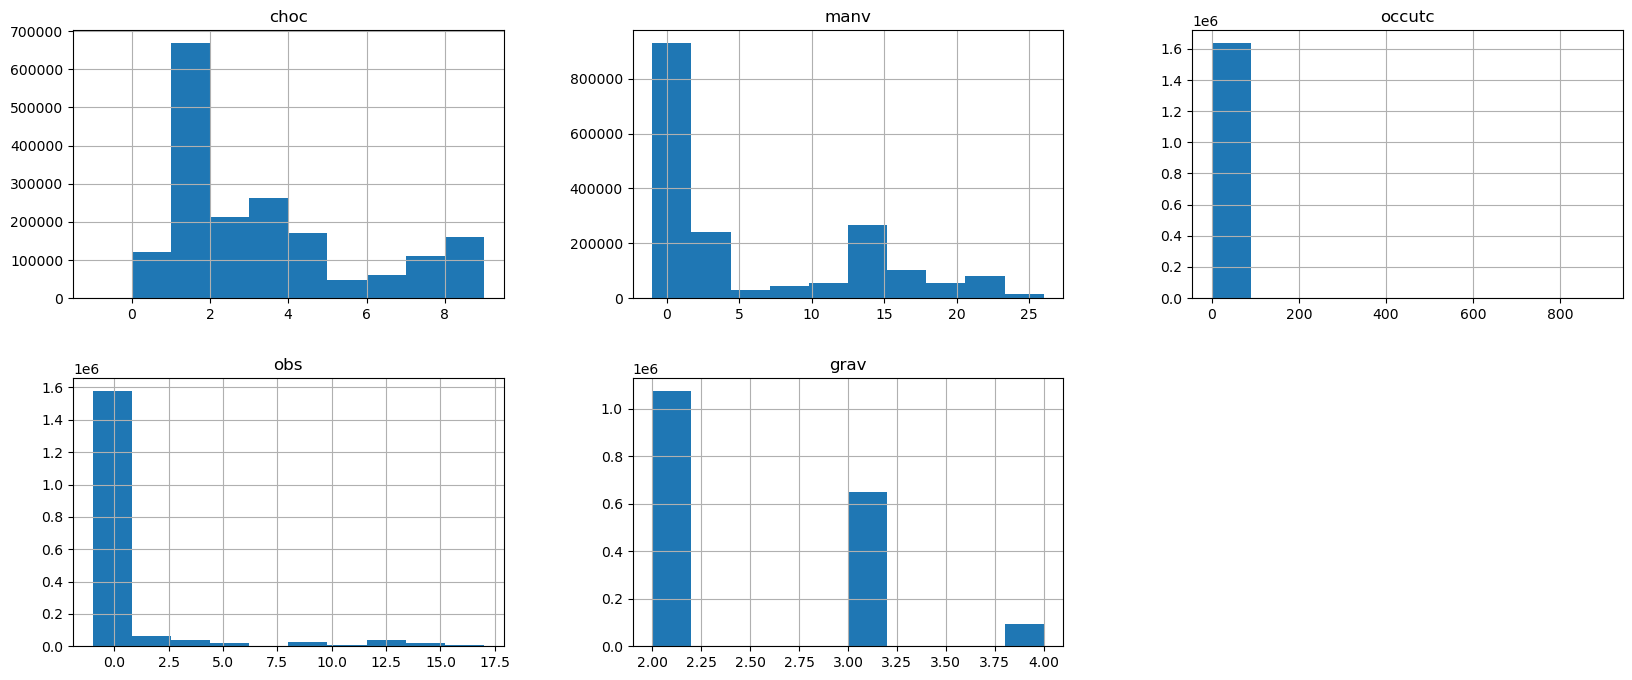

In [22]:

dfVehicules[['choc','manv','occutc','obs','grav']].hist(figsize=(20, 8), layout=(2, 3));


In [23]:
# Gravity variable in dfVehicules dataframe
pd.DataFrame({'prop':dfVehicules.grav.value_counts(normalize=True),
              'count':dfVehicules.grav.value_counts()})

,prop,count
2,0.590521,1073323
3,0.357891,650498
4,0.051588,93766


# Graphs pertinants
- Table Usagers-

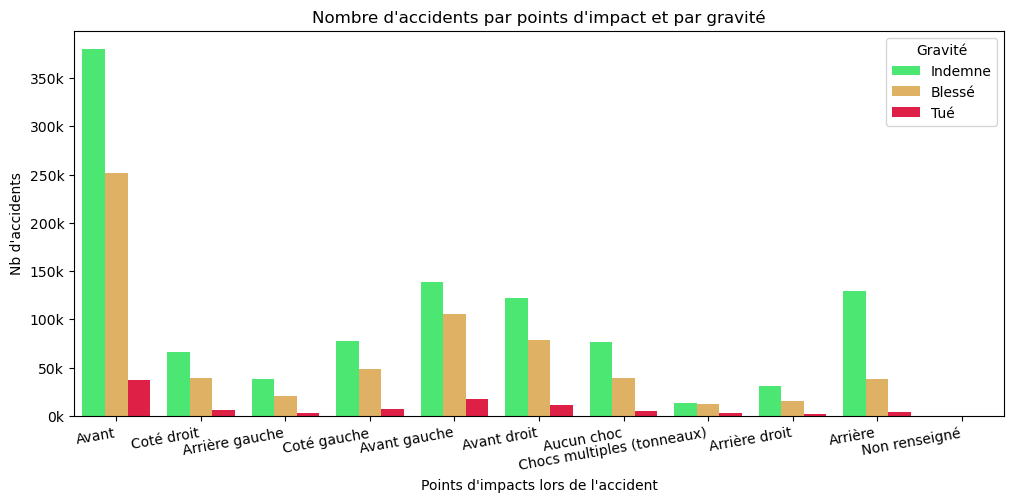

In [24]:
#nbre d'accidents par point d'impact et par gravité
df_choc=dfVehicules[['Num_Acc','choc','lbl_choc','grav']]


plt.figure(figsize=(12,5))
ax=sns.countplot(x='lbl_choc',data=df_choc,palette=['#33FF66','#F4B650','#FF0033'],hue='grav')
ax.set_xlabel("Points d'impacts lors de l'accident", fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")

ax.set_ylabel("Nb d'accidents", fontsize = 10)
ax.set_title("Nombre d'accidents par points d'impact et par gravité");

ax.legend(title='Gravité', loc='upper right', labels=['Indemne','Blessé', 'Tué']);

# ax.set(yscale="log")
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2%}'.format(y/10000)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}k'.format(y/1000)))

In [25]:
#dfVehicules['grav'].unique()
df=df_choc[(df_choc['choc']==1) & (df_choc['grav']==2)]
df

,Num_Acc,choc,lbl_choc,grav
76,201600000050,1.0,Avant,2
155,201600000101,1.0,Avant,2
157,201600000101,1.0,Avant,2
170,201600000110,1.0,Avant,2
176,201600000115,1.0,Avant,2
...,...,...,...,...
1817570,202000047736,1.0,Avant,2
1817578,202000047740,1.0,Avant,2
1817580,202000047741,1.0,Avant,2
1817585,202000047743,1.0,Avant,2
